<a href="https://colab.research.google.com/github/gilvandrocesardemedeiros/DCA_UFRN_IA/blob/main/letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
import pandas as pd
import pandas_profiling as pdp
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.spatial.distance import cdist

In [ ]:
df = pd.read_csv('/content/letter-recognition.data',header = None)

In [ ]:
df.profile_report()

In [ ]:
x = df.drop(columns = '0')
y = df['0']

In [ ]:
y = y.replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,
               'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,
               'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,'Z':25,})

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
distortions = []
K = range(1,50)
for k in K: 
    kmeansElbow_model = KMeans(n_clusters=k)
    kmeansElbow_model.fit(x)
    distortions.append(sum(np.min(cdist(x,kmeansElbow_model.cluster_centers_,"euclidean"),axis=1))/x.shape[0])

range(1, 50)
4.737645992611694


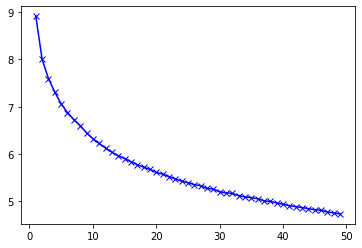

In [ ]:
#Plot distortions againt K value
print(K)
# checking for min of K value
print(np.min(distortions))
#Plotting for change in K value
plt.plot(K,distortions,'bx-')

In [ ]:
nclusters = 26
kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(x)

In [ ]:
pred = kmeans.predict(x)

In [ ]:
contadores = np.zeros((26,nclusters))
for i in range(len(y)):
  for j in range(nclusters):
    if y.iloc[i] == j:
      contadores[j][pred[i]] +=1

In [ ]:
contadores

array([[ 29.,   0.,   4.,   0.,   0.,   0.,  26.,   0.,   1.,   0.,   5.,
          0.,   6.,   0.,   0.,   2., 277., 391.,  24.,  24.,   0.,   0.,
          0.,   0.,   0.,   0.],
       [ 78.,  91.,  87.,   1.,   0.,   0.,   0.,   0.,   3.,   0., 106.,
        167.,   0.,   0.,   6.,   0.,   0.,   0.,  63.,  62.,   0.,   0.,
        101.,   0.,   1.,   0.],
       [ 50.,   0.,  31.,   7., 116.,   0.,  23.,   3.,   3.,  85.,   0.,
          9.,   0.,   1.,   0.,   0.,   0.,   0.,  23.,  28.,   0.,   0.,
         91.,   0.,   0., 266.],
       [ 58., 108., 113.,   8.,   0.,   0.,   8.,   0.,   5.,   3., 151.,
        170.,   0.,   1.,  39.,   0.,   0.,   5.,  33.,  53.,   0.,   0.,
         50.,   0.,   0.,   0.],
       [ 88.,  86.,  37.,   0.,  34.,   0.,   0.,   0.,   2.,  74.,  63.,
         35.,   0.,   0.,   0.,   0.,   0.,   0.,  27.,  27.,   0.,   0.,
         97.,   0.,  32., 166.],
       [ 56.,  18.,   4., 120.,   8.,   0.,  15., 213.,   0.,  22.,  43.,
          1.,   8., 2